# Week 5: Randomness and probability

See the pdf file for a quick introduction to probability concepts.

## Lecture 5.1: Random numbers

In [1]:
from random import *

In [4]:
# uniformly random number in the interval [0,1]
# try running it multiple times to get different results
random()

0.5096941673921825

In a Jupyter Notebook, pressing Ctrl-Enter should run the current cell and then leave the focus on the same cell (rather than the one below it).  This is useful for running the same cell multiple times.

In [5]:
# generating a list of independent random numbers
[random() for i in range(5)]

[0.8410623945191882,
 0.7560672981766945,
 0.236725224438202,
 0.12755809152561748,
 0.07699494111594885]

In [8]:
# Once we store a random number in a variable, it's fixed
a = random()
[a for i in range(5)]

[0.8704487716386804,
 0.8704487716386804,
 0.8704487716386804,
 0.8704487716386804,
 0.8704487716386804]

In [9]:
# Similarly
[random()]*5

[0.5386367870390756,
 0.5386367870390756,
 0.5386367870390756,
 0.5386367870390756,
 0.5386367870390756]

Let's check uniformity using a histogram.

In [10]:
import matplotlib.pyplot as plt

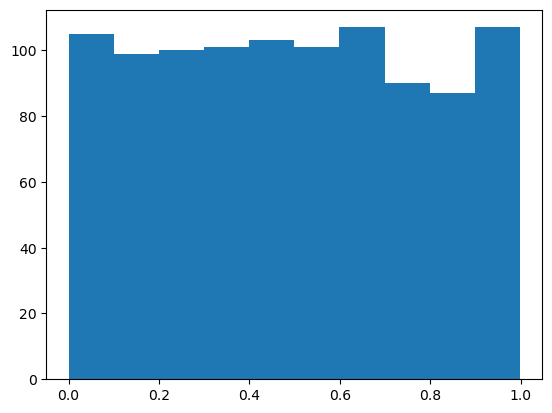

In [11]:
x = [random() for i in range(1000)]
plt.hist(x)
plt.show()

To get a more informative picture we can use more samples to average out the fluctuations, and also increase the number of bins in the histogram to show the shape in more detail.

In addition using `density=True` scales the bar heights as densities: proportion of samples per unit length.  We can also play with visual aspects - setting `edgecolor` can look nice.

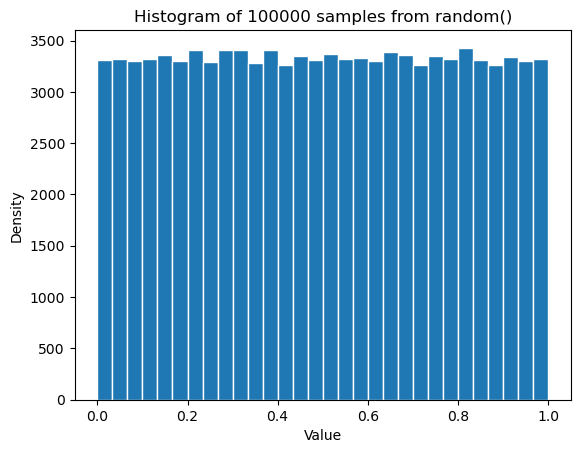

In [17]:
x = [random() for i in range(100000)]                 # more samples, and making it look nicer
histogram = plt.hist(x, edgecolor='white', bins=30) #, density=True)  # scales heights as probability density
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of 100000 samples from random()')
plt.show()

`plt.hist()` returns a tuple containing three elements:

In [15]:
type(histogram)

tuple

In [18]:
counts, bin_edges, patches = histogram
print(f"Count in each bin = {counts} \nEdges of each bin = {bin_edges}")

Count in each bin = [3309. 3321. 3301. 3322. 3360. 3304. 3407. 3295. 3405. 3410. 3284. 3403.
 3265. 3347. 3306. 3371. 3324. 3328. 3304. 3385. 3360. 3264. 3351. 3317.
 3430. 3307. 3258. 3341. 3304. 3317.] 
Edges of each bin = [3.40592540e-06 3.33365893e-02 6.66697728e-02 1.00002956e-01
 1.33336140e-01 1.66669323e-01 2.00002506e-01 2.33335690e-01
 2.66668873e-01 3.00002057e-01 3.33335240e-01 3.66668424e-01
 4.00001607e-01 4.33334790e-01 4.66667974e-01 5.00001157e-01
 5.33334341e-01 5.66667524e-01 6.00000708e-01 6.33333891e-01
 6.66667074e-01 7.00000258e-01 7.33333441e-01 7.66666625e-01
 7.99999808e-01 8.33332992e-01 8.66666175e-01 8.99999358e-01
 9.33332542e-01 9.66665725e-01 9.99998909e-01]


* `counts` is an array containing the number of data points that fall into each bin
* `bin_edges` is an array of the calculated edge values for each bin
* `patches` is a list of the individual graphical objects (the rectangular bars) that were drawn on the plot.

Try experimenting with the number of samples and the number of bins in the histogram.  With too many bins or too few samples, the picture will look noisy, because the number of samples per bin is small, so random fluctuations are more apparent.  A good choice of number of bins is a matter of compromise.

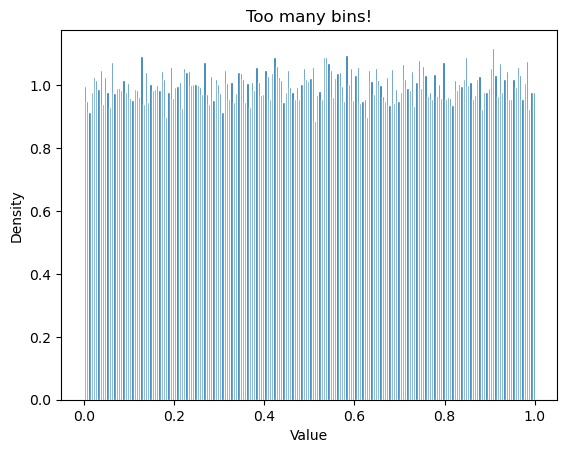

In [21]:
x  =[random() for i in range(100000)]
plt.hist(x, bins=200, edgecolor = 'white', density=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Too many bins!')
plt.show()

We can interpret a pair of random numbers as the coordinates of a point.  The points should be uniformly distributed on the square $[0,1]^2$.

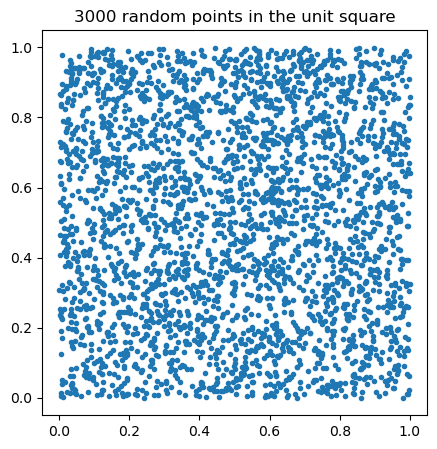

In [24]:
pts = [[random(),random()] for i in range(3000)]   # 3000 random points in the unit square
x = [p[0] for p in pts]
y = [p[1] for p in pts]                            # extract the x and y coordinates
plt.figure(figsize=(5,5))
plt.plot(x,y, '.')
plt.gca().set_aspect('equal')  # equal aspect ratio plot
plt.title('3000 random points in the unit square')
plt.show()

## Behind the curtain - pseudorandomness and seeds
Computer-generated random numbers are not genuinely random but "pseudorandom" - produced by a deterministic algorithm starting from a "seed", something like the following.  The functions $f$ and $g$ need to be carefully chosen so that resulting numbers pass typical statistical tests of randomness.  Finding good choices is a significant research area.

In [ ]:
# INCOMPLETE CODE - DO NOT TRY TO USE!

STATE = 12356714389789   # initial state or "seed"

def my_random():
    global STATE
    STATE = f(STATE)     # f takes a big number and returns another, "not too closely related"
    return g(STATE)    # g takes some information from the state, maybe the last k digits

From the Wikipedia entries on pseudorandomness and random number generators:

>The first attempt to provide researchers with a ready supply of random digits was in 1927, when the Cambridge University Press published a table of 41,600 digits developed by L.H.C. Tippett. In 1947, the RAND Corporation generated numbers by the electronic simulation of a roulette wheel; the results were eventually published in 1955 as A Million Random Digits with 100,000 Normal Deviates.
>
>...
>
>A major advance in the construction of pseudorandom generators was the introduction of techniques based on linear recurrences on the two-element field; such generators are related to linear feedback shift registers.
>
>...
>
>The 1997 invention of the Mersenne Twister, in particular, avoided many of the problems with earlier generators. The Mersenne Twister has a period of $2^{19937}−1$ iterations (≈4$.3×10^{6001}$), is proven to be equidistributed in (up to) 623 dimensions (for 32-bit values), and at the time of its introduction was running faster than other statistically reasonable generators.

Python uses the Mersenne Twister.

Another thing to be aware of is that the output of `random()` cannot be literally *any* real number in $[0,1]$.  Instead, it can only take a finite set of possible values.  Indeed, the same applies to the real number type in general.  The set of possible values is very large and finely spaced, so this is not a problem for most applications.

We can use pseudorandomness to our advantage: setting the initial internal state or seed to something fixed lets us produce a predictable pseudorandom sequence, so that our program produces exactly the same results when we run it again.

In [25]:
seed(123)   # set the internal state -- by default it initialized from the system clock

In [26]:
[random() for i in range(5)]

[0.052363598850944326,
 0.08718667752263232,
 0.4072417636703983,
 0.10770023493843905,
 0.9011988779516946]

In [27]:
[random() for i in range(5)]  # a different sequence

[0.0381536661023224,
 0.5362020400339269,
 0.33219769850967984,
 0.8520866189293687,
 0.1596623967219699]

In [28]:
seed(123)
[random() for i in range(5)]  # same sequence as before!

[0.052363598850944326,
 0.08718667752263232,
 0.4072417636703983,
 0.10770023493843905,
 0.9011988779516946]

## Doing something with a given probability

In [32]:
p = 1/4

for i in range(20):
    print(i)
    if random() < p:
        print('Surprise!')  # do this with probability p at each step

0
Surprise!
1
2
3
4
5
6
7
8
Surprise!
9
10
Surprise!
11
12
13
14
Surprise!
15
Surprise!
16
Surprise!
17
18
19


Law of Large Numbers

In [33]:
count = 0
count_total = 0
p = 1/4

while count <= 1e5:
  if random() < p:
    count += 1
  count_total += 1
print(count / count_total)


0.25004313200895145
